# logistic softmax:
## --> Usually logistic regression has sigmoid output layer that can only used to predict two classes
## --> For multi-class classification we have to use softmax
## --> so we are going to implement logistic regression with softmax in output layer

# Data
## --> The data we are going to use is facial recognintion dataset from Kaggle
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data
## --> The data contains image pixels in one column and labels in another column
## --> The total number of classes in labels is 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
% cd /content/drive/MyDrive/facial\ expression\ dataset

/content/drive/MyDrive/facial expression dataset


In [ ]:
%ls

train.csv


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
label = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
Y = np.array(df.iloc[:,0].astype(int))

In [ ]:
#splitting the data in rows and storing it in separate column and dividing it by 255
X = [] 
for i in range(len(df)):
  x = np.array(df.iloc[i][1].split()).astype(float)/ 255
  X.append(x)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(28709, 2304)

## visualizing our data

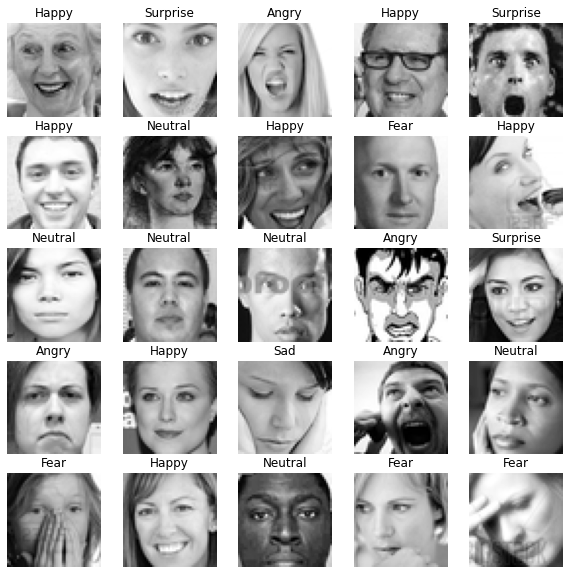

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(X[i+25].reshape((48 , 48)) ,  cmap = "gray")
  plt.title(label[Y[i+25]])
  plt.axis("off")

In [ ]:
xtrain , xtest , ytrain ,ytest = train_test_split(X ,Y , test_size = 0.2)

# lets write our own class for logistic regression with softmax

In [ ]:
class LogisticSoftmax:
    def __init__(self):
        self.W = None

    @staticmethod
    def softmax(x):
        expA = np.exp(x)
        return(expA / (expA.sum(axis = 1 ,keepdims = True)))


    def forward(self ,w , x):
        return(self.softmax(x.dot(w)))

    @staticmethod
    def cross_entropy(true_t , y):
        return (-np.sum(true_t * np.log(y)))


    def fit(self , input_x , true_y , learning_rate = 10e-7 , l1 = 10e-10 , epochs =10000 , show_cost_fig = True):
        N ,D = np.shape(input_x)

        x = np.concatenate((np.ones((N ,1)) , input_x) , axis = 1)
        
        K = len(set(true_y))
        
        #converting true_y[n] matrix to true_y[n,k]
        true_t = np.zeros((N ,K ))
        for i in range(len(true_y)):
            true_t[i , true_y[i]] = 1

        if (self.W is None):
            self.W = np.random.randn(D + 1 , K) # D+1 is because bias term added in column
            
        
        costs = []
        for i in range(epochs):
            # forward propagation
            Y = self.forward(self.W , x)
            
            #gradient descent
            #self.W -= learning_rate*(x.dot(Y - true_t) + l2*np.sign(self.W)) for l2 regularization
            self.W -= learning_rate*(x.T.dot(Y - true_t) + l1*self.W) #l1 regularization
            
            if((i % 50) == 0):
                c = self.cross_entropy(true_t , Y)
                costs.append([i , c])
                acc = self.accuracy(x , true_y)
                print(f"epochs: {i} --- cross_entropy : {c} --- Accuracy : {acc}")

        if (show_cost_fig):
            costs  = np.array(costs)
            plt.plot(costs[: ,0] , costs[: ,1])


    def predict(self , x):
        x = np.concatenate((np.ones((len(x) ,1)) , x) , axis = 1)
        return(np.argmax(self.forward(self.W ,x) , axis =1))

    def score(self ,x , true_y ):
        y = self.predict(x)
        return(np.mean(y == true_y))

    def accuracy(self , x ,true_y):
        y = np.argmax(self.forward(self.W ,x) , axis =1)
        return(np.mean(y == true_y))
        


In [ ]:
ls = LogisticSoftmax()

epochs: 0 --- cross_entropy : 62788.41308089386 --- Accuracy : 0.29895066835024164
epochs: 50 --- cross_entropy : 62739.34058107239 --- Accuracy : 0.2988200461531763
epochs: 100 --- cross_entropy : 62690.42996956964 --- Accuracy : 0.2989071276178865
epochs: 150 --- cross_entropy : 62641.68036345591 --- Accuracy : 0.2988200461531763
epochs: 200 --- cross_entropy : 62593.09088637468 --- Accuracy : 0.29886358688553144
epochs: 250 --- cross_entropy : 62544.66066847711 --- Accuracy : 0.2988200461531763
epochs: 300 --- cross_entropy : 62496.38884635786 --- Accuracy : 0.2989942090825968
epochs: 350 --- cross_entropy : 62448.27456299177 --- Accuracy : 0.29921191274437237
epochs: 400 --- cross_entropy : 62400.31696767178 --- Accuracy : 0.2994731571385031
epochs: 450 --- cross_entropy : 62352.51521594784 --- Accuracy : 0.2994731571385031
epochs: 500 --- cross_entropy : 62304.868469566645 --- Accuracy : 0.29951669787085816
epochs: 550 --- cross_entropy : 62257.37589641259 --- Accuracy : 0.2996908

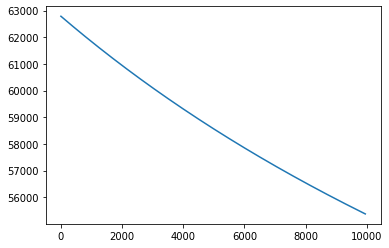

In [ ]:
ls.fit(xtrain  ,ytrain)

In [ ]:
ls.score(xtrain, ytrain)

0.31584447250402753

In [ ]:
ls.score(xtest,ytest)

0.28213166144200624

In [ ]:
pred = ls.predict( xtest)

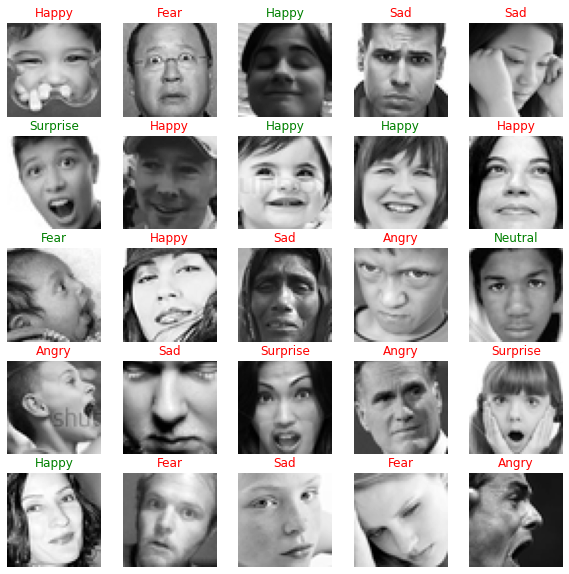

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
    c = "red"
    if (ytest[i] == pred[i]):
        c = "green"
    ax = plt.subplot(5,5,i+1)
    plt.imshow(xtest[i].reshape((48 , 48)) ,  cmap = "gray")
    plt.title(label[ytest[i]] , color = c)
    plt.axis("off")